# Indina Institute of Technology Indore
## Assignment 1
### Course: AA 651 Astronomy Laboratory - I
#### Course Instructor: Dr. Manoneeta Chakraborty
#### Program: M.Sc.Astronomy
#### Student's Name: Prasad Rajesh Posture
#### Roll No.: 2303121013

### Importing Dependencies

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as sc_integ

### Problem 1

In [3]:
# Single Precision
# For this we will enforce the float32 data type on each float
s = np.float32(1.0)
for k in range(1, 101):
    s = np.float32(0.5) * s
    t = s + np.float32(1.0)
    if t <= np.float32(1.0):
        s = np.float32(2.0) * s
        print("Single Precision:","k=",k-1,", s=",s)
        break
        
# Double Precision
# Since float64 data-type is by default we don't have enoforce it for calculating the answer with touble precision
s = 1.0
for k in range(1, 101):
    s = 0.5 * s
    t = s + 1.0
    if t <= 1.0:
        s = 2.0 * s
        print("Double Precision:","k=",k-1,", s=",s)
        break

Single Precision: k= 23 , s= 1.1920929e-07
Double Precision: k= 52 , s= 2.220446049250313e-16


### Problem 2

x =  0.1
Fractional Error for Method 1:  7.651817784682282e-15
Fractional Error for Method 2:  7.825722734334032e-15


x =  0.01
Fractional Error for Method 1:  9.947803615230697e-13
Fractional Error for Method 2:  9.947803615210904e-13


x =  0.001
Fractional Error for Method 1:  5.871400923466347e-11
Fractional Error for Method 2:  5.871400924155813e-11


Mean Fractional Error for Method 1:  1.990548047132374e-11
Mean Fractional Error for Method 2:  1.9905538441937855e-11




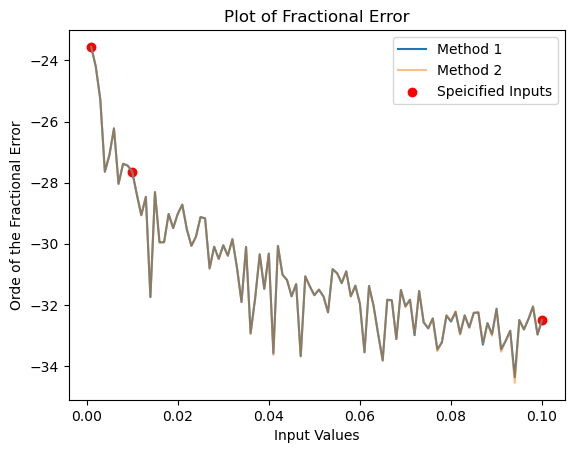

In [4]:
# Defining the functions
def function1(x):
    return (x**2 + 1.0)**(0.5) - 1.0

def function2(x):
    return x**2 / ((x**2 + 1.0)**(0.5) + 1.0)

# Finding outputs of the function from the given input values
x_values = [0.1, 0.01, 0.001] 

# We will intiate two empty empty lists to store the fractional error caused by both methods
y1_errors = [] 
y2_errors = []

for x in x_values:
    y1 = function1(x)
    y2 = function2(x)
    mean_error = (y1+y2) / 2 # We will take mean as the reference value
    error1 = abs(mean_error - y1) / abs(y1) # fractional error caused by method 1
    y1_errors.append(error1)
    error2 = abs(mean_error - y2) / abs(y2) # fractional error caused by method 2
    y2_errors.append(error2)
    print("x = ", x)
    print("Fractional Error for Method 1: ", error1)
    print("Fractional Error for Method 2: ", error2)
    print("\n")
    
print("Mean Fractional Error for Method 1: ",np.mean(y1_errors))
print("Mean Fractional Error for Method 2: ",np.mean(y2_errors))
print("\n")

# Taking values from 0.001 to 0.1 with interval of 0.001 to see the larger picture of variation in errors
# We will follow similiar steps as above but in addition to that plot graph to visualize the variation
y1_errorsp = []
y2_errorsp = []
xs_values = np.arange(0.001, 0.101, 0.001)
for xs in xs_values:
    y1s = function1(xs)
    y2s = function2(xs)
    mean_error = (y1s + y2s) / 2
    error1s = abs(mean_error - y1s) / abs(mean_error)
    y1_errorsp.append(error1s)
    error2s = abs(mean_error - y2s) / abs(mean_error)
    y2_errorsp.append(error2s)

# We will take log of the error terms since they are of very small order, hence wouldn't be visualized properly without log
plt.plot(xs_values,np.log(y1_errorsp))
plt.plot(xs_values,np.log(y2_errorsp),alpha=0.5)
plt.scatter(x_values, np.log(y1_errors),color='r')
plt.scatter(x_values, np.log(y2_errors),color='r', alpha=0.3)
plt.legend(['Method 1', 'Method 2', 'Speicified Inputs'])
plt.ylabel("Orde of the Fractional Error")
plt.xlabel("Input Values")
plt.title("Plot of Fractional Error")
plt.show()

### Problem 3

for n: 16 ,x^n: 0.0004531038537312071 ,Fractional Error: 1.183296944513813e-10 ,Log of Fractional Error: -22.857546366709155
for n: 30 ,x^n: 5.374453024842296e-07 ,Fractional Error: 8.40896189873099e-05 ,Log of Fractional Error: -9.383627435140436


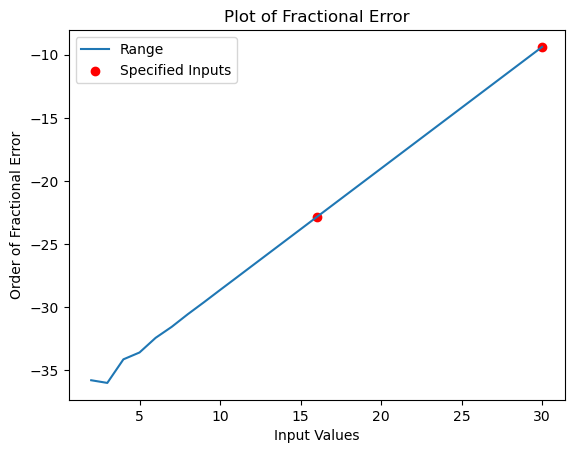

In [25]:
# Calculating x from the given equation
x = ((5.0)**(0.5) - 1.0) / 2.0

# Defining a function for reccurence relation
# x^(n+1) = x^(n-1)-x^(n)
# Equivalently x^(n) = x^(n-2)-x^(n-1)
def recursion(n):
    if n==0: 
        return 1 # Alternate case 1
    elif n==1:
        return x # Alternate case 2
    else:
        return recursion(n-2)-recursion(n-1) # Calling the function within itself

# Calculating fractional error for the given values of n: 16, 30, 40, 50
x_inputs = [16,30] #,40, 50 : Couldn't proceed with them because of the redundant calculations
output_errors = []
for i in x_inputs:
    out = recursion(i)
    output_errors.append(abs(x**i-out)/abs(x**i))
    print("for n:",i,",x^n:",out,",Fractional Error:",abs(x**i-out)/abs(x**i),",Log of Fractional Error:",np.log(abs(x**i-out)/abs(x**i)))

# Plotting with additional numbers for the broader view   
fractional_error=[]
k=range(2,31)
for i in k:
    fractional_error.append(abs(x**i-recursion(i))/abs(x**i))
plt.plot(k,np.log(fractional_error))
plt.scatter(x_inputs, np.log(output_errors), color='r')
plt.title("Plot of Fractional Error")
plt.xlabel("Input Values")
plt.ylabel("Order of Fractional Error")
plt.legend(['Input Range','Specified Inputs']);

### Problem 4

for n: 15 ,Y(n): 0.16042630893253407 ,Fractional Error: 0.0013764376215093784 ,Log of Fractional Error: -6.588256551147002
for n: 20 ,Y(n): 0.12380383076256998 ,Fractional Error: 3318.3565543392006 ,Log of Fractional Error: 8.107224925597526


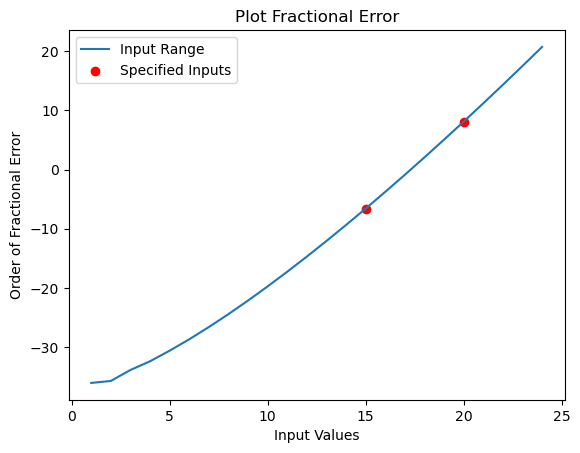

In [6]:
# Defining a function to be integrated: (x^n)*(e^x) with default value of n = 0
def func(x,n):
    return (x**n)*(np.exp(x))

# Defining the reccurence relation
# y(n+1) = e - (n+1)y(n)
# Equivalently y(n) = e - (n)y(n-1)

def recursive_integ(n):
    if n==0:
        return sc_integ.quad(func,0.0,1.0, args=(n))[0] # Alternate case: integrating when n=0
    else:
        return np.e-(n)*recursive_integ(n-1) # Calling the function within itself

# Calculating for specified inputs
nlist = [15, 20]
f_sp_error=[]
for n in nlist:
    rec_out = recursive_integ(n)
    int_out = sc_integ.quad(func,0.0,1.0,args=(n))[0]
    f_error = abs(rec_out-int_out)/abs(int_out)
    f_sp_error.append(f_error)
    print("for n:",n,",Y(n):",int_out,",Fractional Error:",f_error,",Log of Fractional Error:",np.log(f_error))

# Calculating for a range of values
f_r_error=[]
k=range(1,25)
for n in k:
    rec_out = recursive_integ(n)
    int_out = sc_integ.quad(func,0.0,1.0,args=(n))[0]
    f_error = abs(rec_out-int_out)/abs(int_out)
    f_r_error.append(f_error)
    
# Plotting with range and speicified inputs
plt.plot(k, np.log(f_r_error))
plt.scatter(nlist, np.log(f_sp_error),color='r')
plt.title("Plot Fractional Error")
plt.xlabel("Input Values")
plt.ylabel("Order of Fractional Error")
plt.legend(['Input Range','Specified Inputs']);

### Problem 5

In [7]:
# Single Digit Precison
print("Single Digit Precision")
x = np.array([2.718281823, -3.141592654, 1.414213562, 0.5772156649, 0.3010299957])
x = np.float32(x)
y = np.array([1486.2497, 878366.9879, -22.37492, 4773714.647, 0.000185049])
y = np.float32(y)
print("Forward Order Summation: ",np.dot(x,y))
print("Reverse Order Summation: ",np.dot(x[::-1],y[::-1]))
x_positive = x[x>0]
x_positive = sorted(x_positive)
x_negative = x[x<0]
y_positive = y[y>0]
y_positive = sorted(y_positive)
y_negative = y[y<0]
partial_positive_sum = np.dot(x_positive,y_positive)
partial_negative_sum = np.dot(x_negative,y_negative)
total_sum = partial_positive_sum + partial_negative_sum
print("Largest to Smallest Order:",total_sum)
partial_positive_sum = np.dot(x_positive[::-1],y_positive[::-1])
partial_negative_sum = np.dot(x_negative,y_negative)
total_sum = partial_negative_sum + partial_positive_sum
print("Smallest to Largest Order:",total_sum)
print("\n")

# Double digit precision (default)
print("Double Digit Precison")
x = np.array([2.718281823, -3.141592654, 1.414213562, 0.5772156649, 0.3010299957])
y = np.array([1486.2497, 878366.9879, -22.37492, 4773714.647, 0.000185049])
print("Forward Order Summation: ",np.dot(x,y))
print("Reverse Order Summation: ",np.dot(x[::-1],y[::-1]))
x_positive = x[x>0]
x_positive = sorted(x_positive)
x_negative = x[x<0]
y_positive = y[y>0]
y_positive = sorted(y_positive)
y_negative = y[y<0]
partial_positive_sum = np.dot(x_positive,y_positive)
partial_negative_sum = np.dot(x_negative,y_negative)
total_sum = partial_positive_sum + partial_negative_sum
print("Largest to Smallest Order:",total_sum)
partial_positive_sum = np.dot(x_positive[::-1],y_positive[::-1])
partial_negative_sum = np.dot(x_negative,y_negative)
total_sum = partial_negative_sum + partial_positive_sum
print("Smallest to Largest Order:",total_sum)

Single Digit Precision
Forward Order Summation:  -0.34720382
Reverse Order Summation:  -0.34720382
Largest to Smallest Order: 14219427.0
Smallest to Largest Order: 14219427.0


Double Digit Precison
Forward Order Summation:  -7.431385965330528e-06
Reverse Order Summation:  -7.431405265378999e-06
Largest to Smallest Order: 14219428.439379035
Smallest to Largest Order: 14219428.439379035


The End